#### Постройте корреляционную функцию двух сигналов биологической природы. Найдите сдвиг при котором достигается максимум корреляции, и значение этого максимума.

##### Частота сигнала 250 Гц. Время - примерно 10 минут.

##### Сделайте сдвиг [−2,+2] минуты.

In [512]:
import numpy as np
import matplotlib.pyplot as plt

In [513]:
first_values = np.loadtxt("3.txt")
second_values = np.loadtxt("9.txt")

In [514]:
first_values

array([-0.206875, -0.20875 , -0.2125  , ...,  0.395   ,  0.386875,
        0.380625])

In [515]:
second_values

array([0.236875, 0.251875, 0.26625 , ..., 1.4125  , 1.41375 , 1.41437 ])

In [516]:
len(first_values)

150936

In [517]:
len(second_values)

150936

In [518]:
print(150936 / 250)

603.744


In [519]:
print(603.744 / 60)

10.0624


In [520]:
time_first = np.arange(len(first_values)) / 250
time_second = np.arange(len(second_values)) / 250

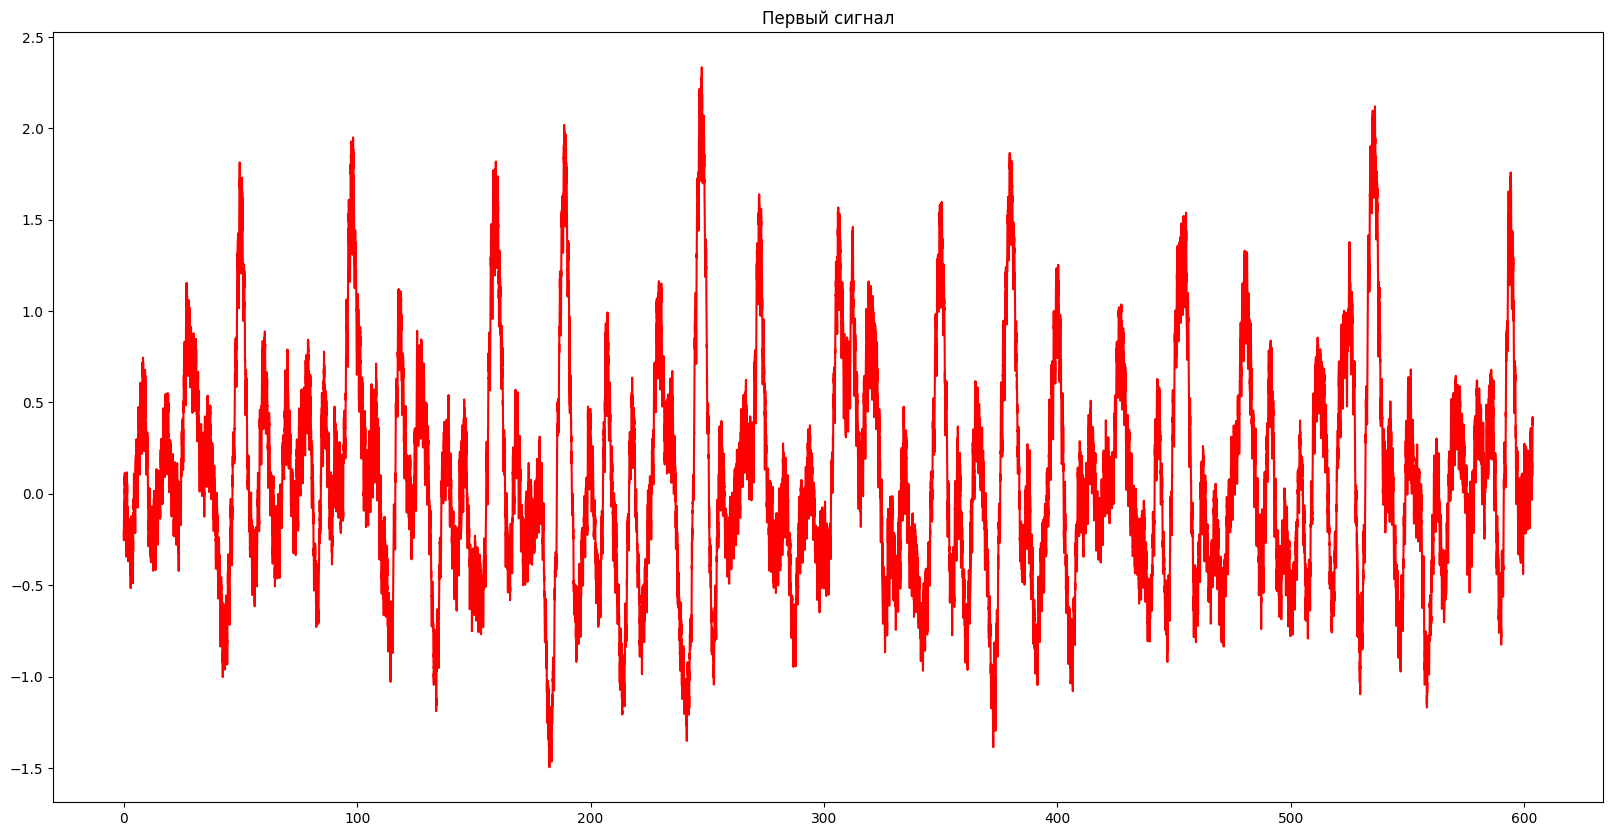

In [521]:
plt.figure(figsize=(20, 10))
plt.plot(time_first, first_values, color = "red")
plt.title('Первый сигнал')
plt.show()

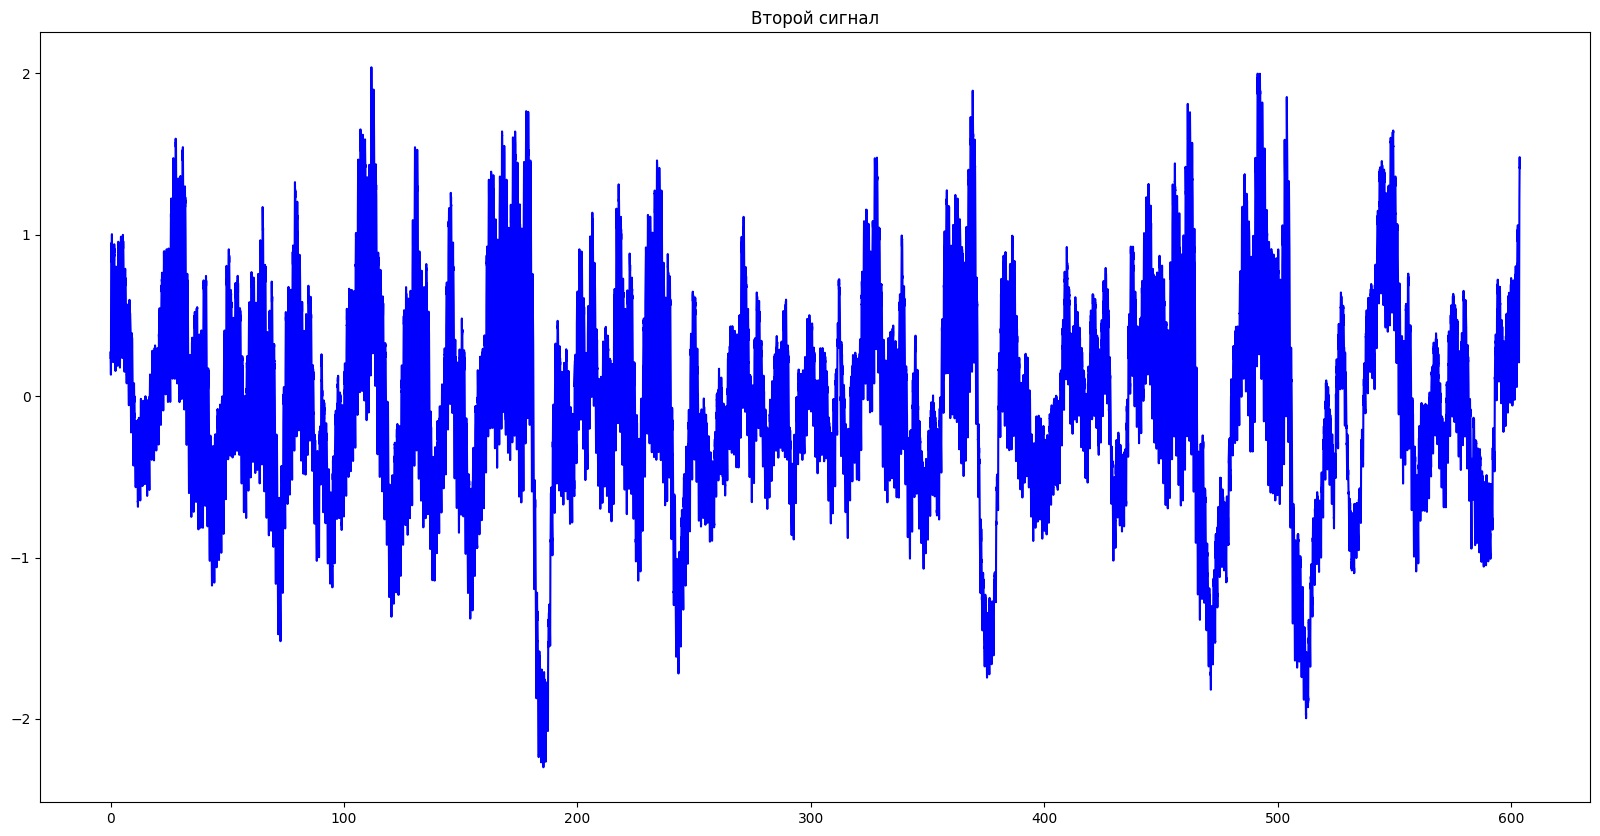

In [522]:
plt.figure(figsize=(20, 10))
plt.plot(time_second, second_values, color = "blue")
plt.title('Второй сигнал')
plt.show()

In [ ]:
corr = np.correlate(first_values, second_values, mode='full') # кросс-корреляция фулл модом

In [524]:
corr

array([-0.29259779, -0.58771927, -0.88788488, ...,  0.29235117,
        0.18751094,  0.09016055])

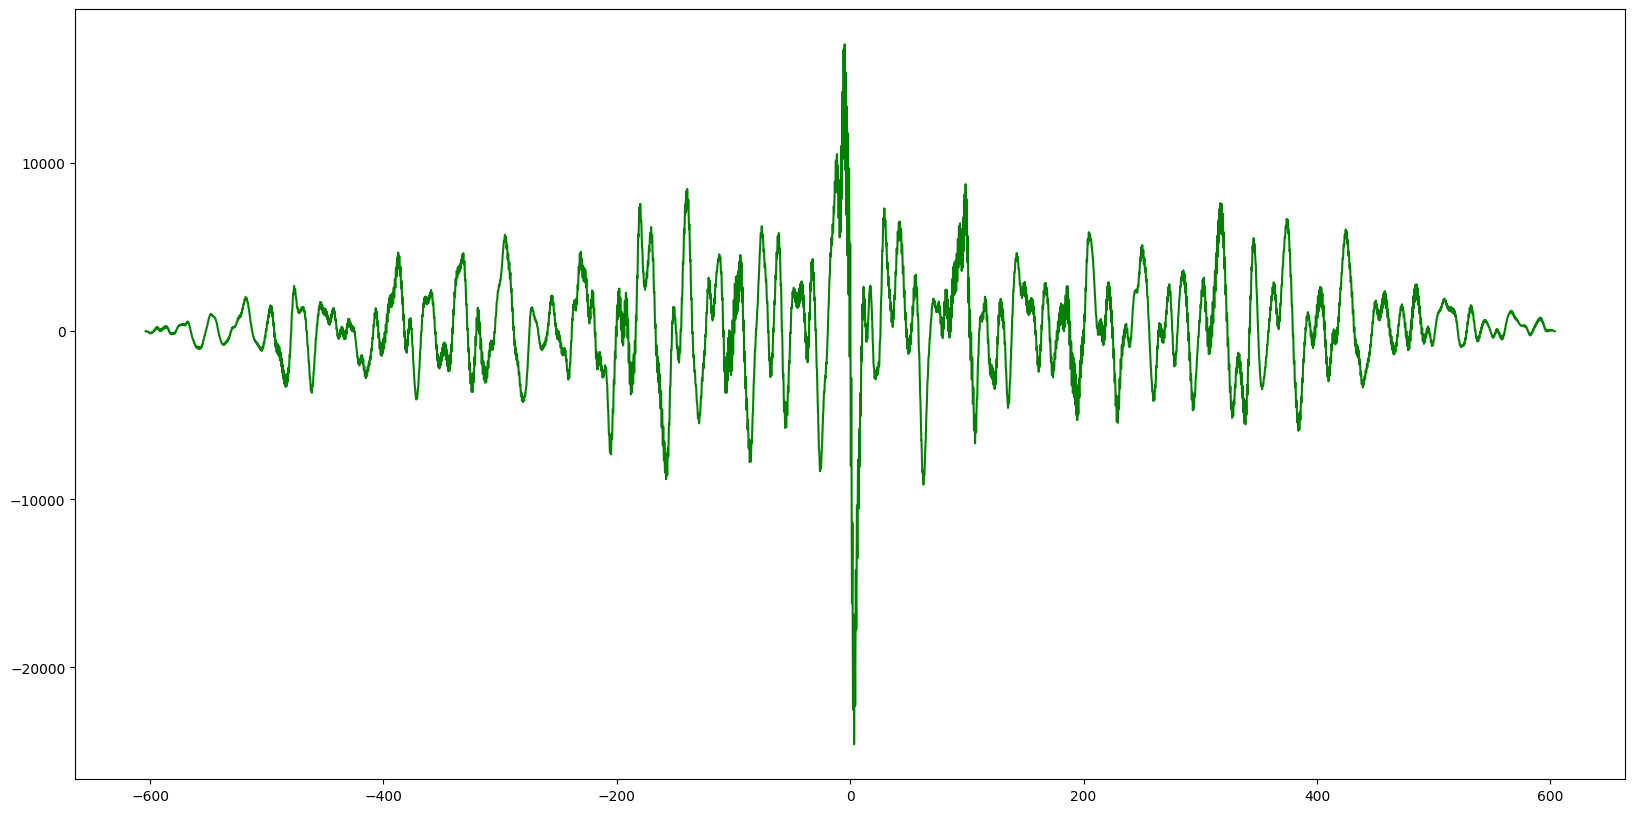

In [525]:
x = np.arange(-len(second_values) + 1, len(first_values)) / 250
plt.figure(figsize=(20, 10))
plt.plot(x, corr, color = 'green')
plt.show()

In [526]:
first_value_std = np.std(first_values)
second_values_std = np.std(second_values)

In [527]:
corr_norm = corr / (first_value_std * second_values_std * len(first_values))

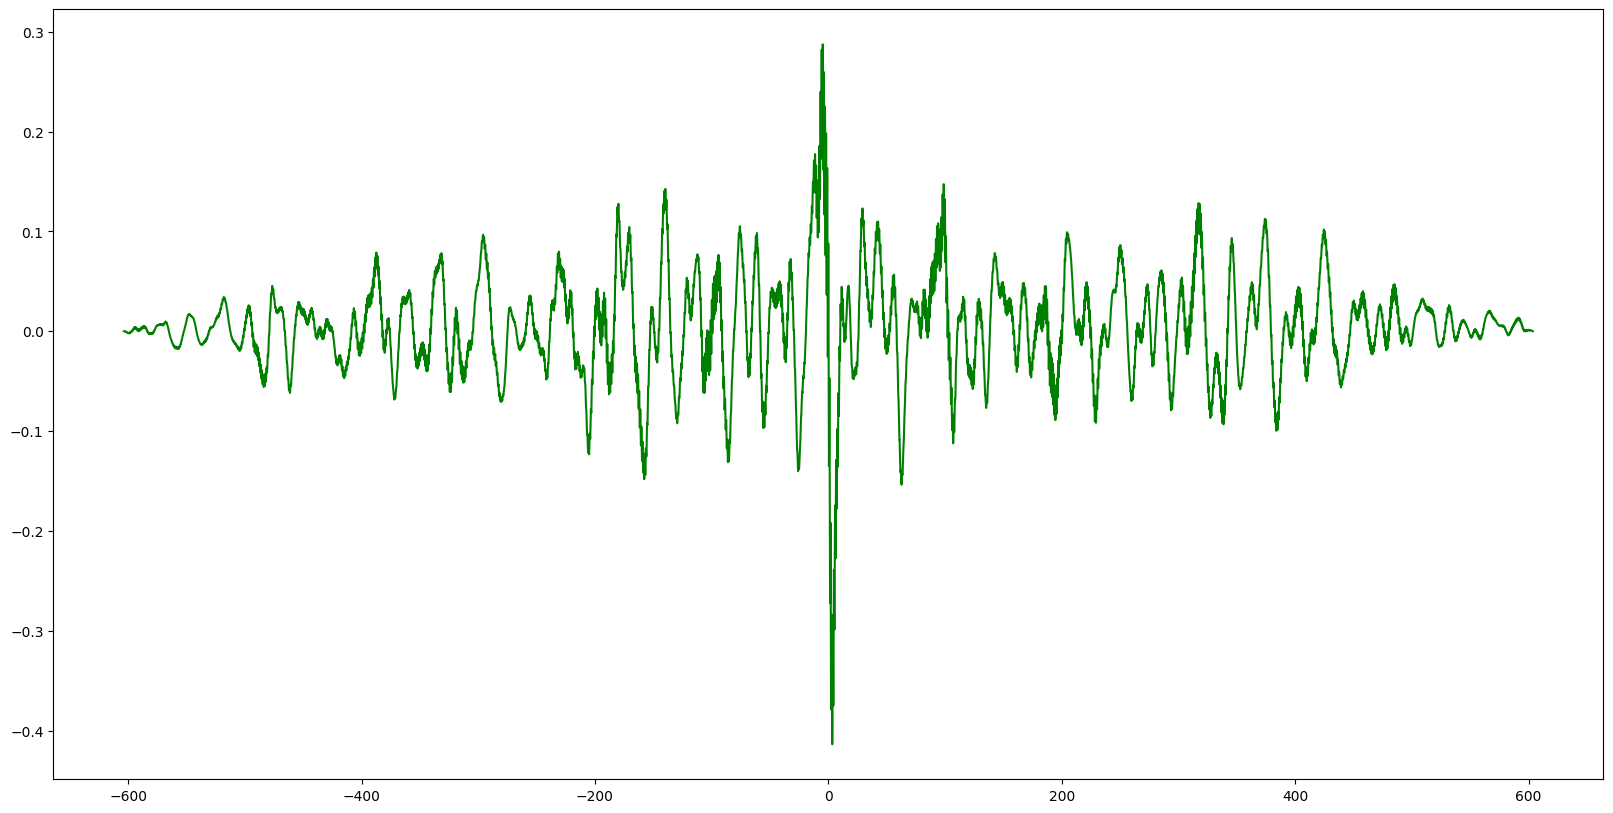

In [528]:
plt.figure(figsize=(20, 10))
plt.plot(x, corr_norm, color = 'green')
plt.show()

In [529]:
two_min = (x >= -120) & (x <= 120) # маска всех значений между 2 минутами

In [530]:
two_min

array([False, False, False, ..., False, False, False])

In [531]:
offsets = x[two_min] # значения в сек сдвига на 2 минуты

In [532]:
offsets

array([-120.   , -119.996, -119.992, ...,  119.992,  119.996,  120.   ])

In [533]:
print(np.min(offsets), np.max(offsets)) # проверка

-120.0 120.0


In [534]:
offset_corr = corr_norm[two_min] # значения номированной корреляции в диапазоне

In [535]:
offset_corr

array([ 0.03588827,  0.035733  ,  0.03558008, ..., -0.04147098,
       -0.04135253, -0.04123212])

In [536]:
max_corr = np.max(offset_corr)

In [537]:
delta = offsets[np.argmax(offset_corr)]

#### Максимальная корреляция

In [538]:
max_corr

np.float64(0.2873886167412729)

#### Разница в сигналах в сек

In [539]:
delta

np.float64(-4.784)

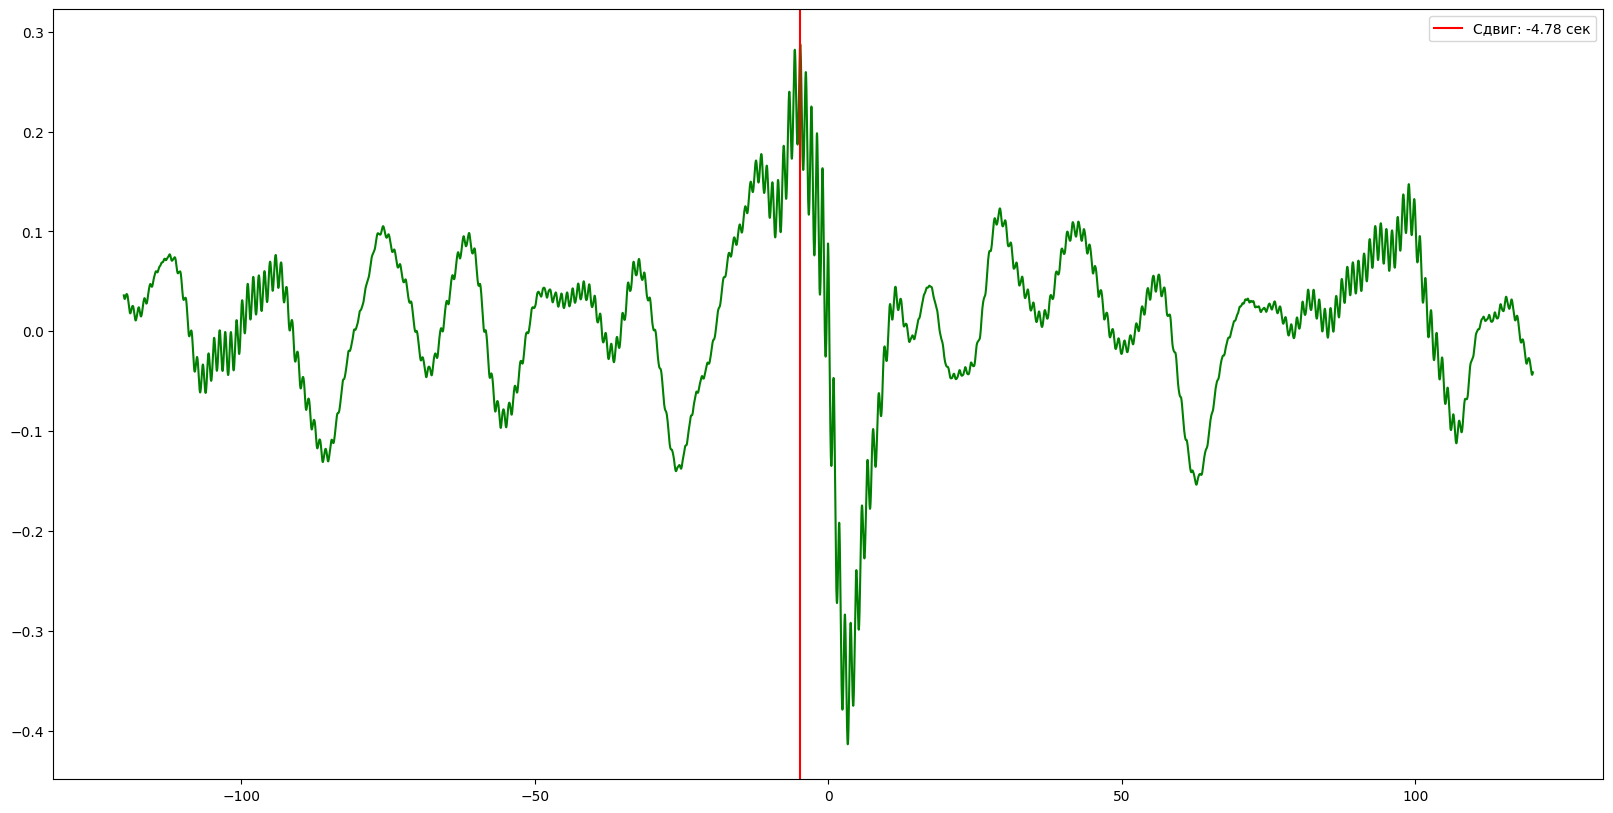

In [540]:
plt.figure(figsize=(20, 10))
plt.plot(offsets, offset_corr, color = 'green')
plt.axvline(delta, color='red', label=f'Сдвиг: {delta:.2f} сек')
plt.legend()
plt.show()